In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data=pd.read_excel('Data_Train.xlsx')

In [4]:
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
data['Mileage']=data['Mileage'].str.replace('kmpl','').str.replace('km/kg','')
data['Engine']=data['Engine'].str.replace('CC','')
data['Power']=data['Power'].str.replace('bhp','')
data.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [8]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

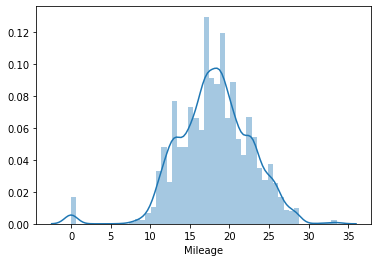

In [9]:
sns.distplot(data['Mileage'])

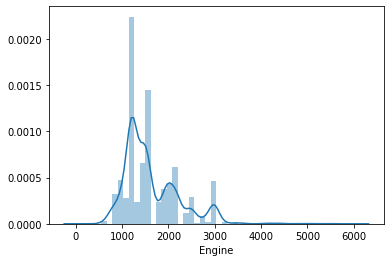

In [10]:
sns.distplot(data['Engine'])

In [46]:
print(data['Kilometers_Driven'].mean())
print(data['Kilometers_Driven'].median())
print(data['Kilometers_Driven'].min())
print(data['Kilometers_Driven'].max())

58738.38029573019
53000.0
171
6500000


In [17]:
data['Power']=data['Power'].fillna(0)
data['Seats']=data['Seats'].fillna(0)


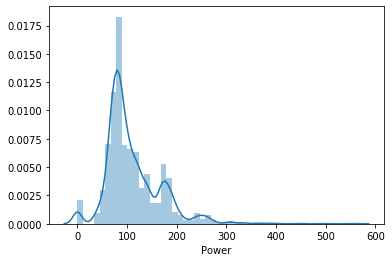

In [18]:
sns.distplot(data['Power'])


0.0 seater
2.0 seater
4.0 seater
5.0 seater
6.0 seater
7.0 seater
8.0 seater
9.0 seater
10.0 seater
[43, 16, 0, 99, 5014, 31, 674, 134, 3, 5]


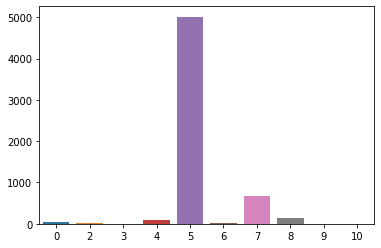

In [39]:
seat=data.groupby('Seats')
for name,group in seat:
    print(str(name)+" seater")
x1=[0,2,3,4,5,6,7,8,9,10]
n=[]
for i in x1:
    n.append(data.Seats[data['Seats']==i].count())
print(n)
sns.barplot(x1,n)

Number of cars in Ahmedabad 224
Number of cars in Bangalore 358
Number of cars in Chennai 494
Number of cars in Coimbatore 636
Number of cars in Delhi 554
Number of cars in Hyderabad 742
Number of cars in Jaipur 413
Number of cars in Kochi 651
Number of cars in Kolkata 535
Number of cars in Mumbai 790
Number of cars in Pune 622


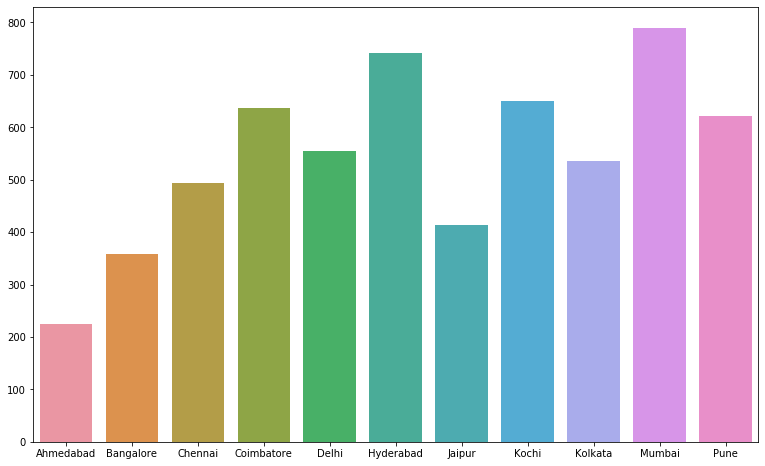

In [55]:
location=data.groupby("Location")
x=[]
for name,group in location:
    x.append(name)
n=[]
for i in x:
    n.append(data.Location[data['Location']==i].count())
    print("Number of cars in "+str(i)+" "+str(data.Location[data['Location']==i].count()))
fig ,ax=plt.subplots(figsize=(13,8))
sns.barplot(x,n,)

['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol']
['Automatic', 'Manual']
Number cars with CNG fuel 56
Number cars with Diesel fuel 3205
Number cars with Electric fuel 2
Number cars with LPG fuel 10
Number cars with Petrol fuel 2746
Number of cars with Automatic Tansmission type are 1720
Number of cars with Manual Tansmission type are 4299


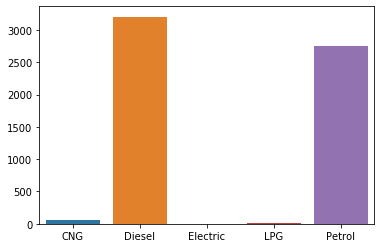

In [75]:
fuel=data.groupby("Fuel_Type")
trans=data.groupby("Transmission")
x1=[]
x2=[]
for name,groups in fuel:
    x1.append(name)
for name,groups in trans:
    x2.append(name)
print(x1)
print(x2)
n1=[]
n2=[]
for i in x1:
    n1.append(data.Fuel_Type[data['Fuel_Type']==i].count())
    print("Number cars with "+str(i)+" fuel "+str(data.Fuel_Type[data['Fuel_Type']==i].count()))
for i in x2:
    n2.append(data.Transmission[data['Transmission']==i].count())
    print("Number of cars with "+str(i)+" Tansmission type are "+str(data.Transmission[data['Transmission']==i].count()))
sns.barplot(x1,n1)  

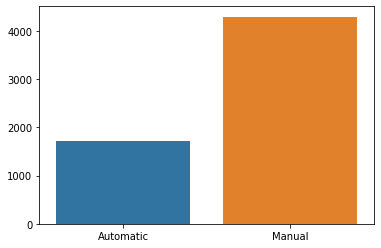

In [74]:
sns.barplot(x2,n2)

Number of cars with First hand owners are: 4929
Number of cars with Fourth & Above hand owners are: 9
Number of cars with Second hand owners are: 968
Number of cars with Third hand owners are: 113


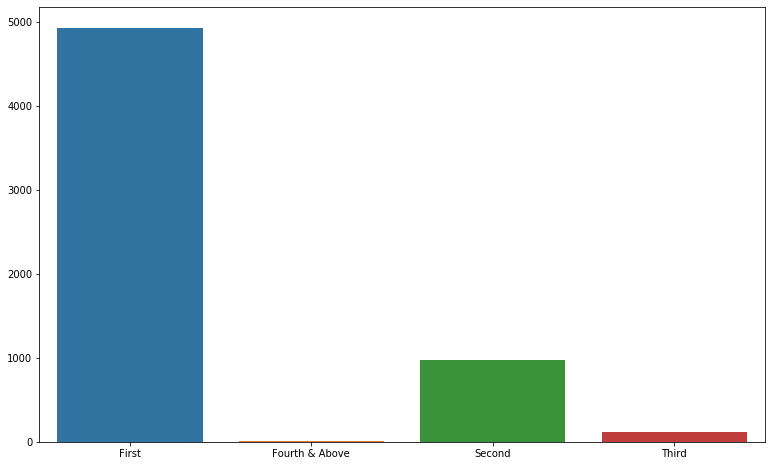

In [77]:
owner=data.groupby("Owner_Type")
x=[]
for name,group in owner:
    x.append(name)
n=[]
for i in x:
    n.append(data.Owner_Type[data['Owner_Type']==i].count())
    print("Number of cars with "+str(i)+" hand owners are: "+str(data.Owner_Type[data['Owner_Type']==i].count()))
fig ,ax=plt.subplots(figsize=(13,8))
sns.barplot(x,n,)

Number of cars bought in 1998 are: 4
Number of cars bought in 1999 are: 2
Number of cars bought in 2000 are: 4
Number of cars bought in 2001 are: 8
Number of cars bought in 2002 are: 15
Number of cars bought in 2003 are: 17
Number of cars bought in 2004 are: 31
Number of cars bought in 2005 are: 57
Number of cars bought in 2006 are: 78
Number of cars bought in 2007 are: 125
Number of cars bought in 2008 are: 174
Number of cars bought in 2009 are: 198
Number of cars bought in 2010 are: 342
Number of cars bought in 2011 are: 466
Number of cars bought in 2012 are: 580
Number of cars bought in 2013 are: 649
Number of cars bought in 2014 are: 797
Number of cars bought in 2015 are: 744
Number of cars bought in 2016 are: 741
Number of cars bought in 2017 are: 587
Number of cars bought in 2018 are: 298
Number of cars bought in 2019 are: 102


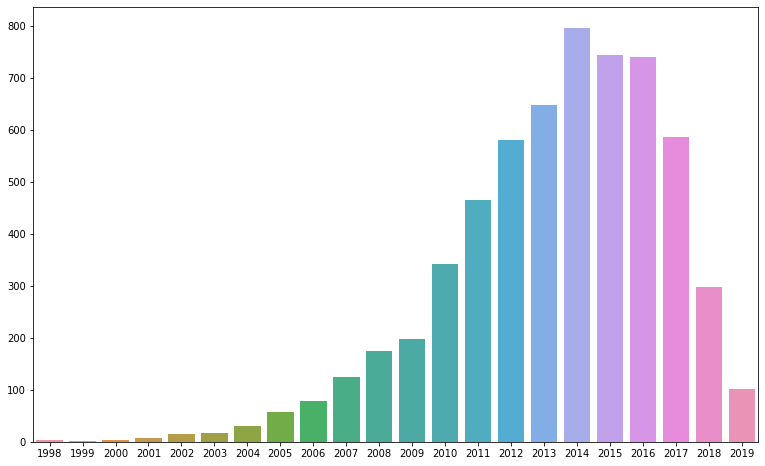

In [80]:
years=data.groupby("Year")
x=[]
for name,group in years:
    x.append(name)
n=[]
for i in x:
    n.append(data.Year[data['Year']==i].count())
    print("Number of cars bought in "+str(i)+" are: "+str(data.Year[data['Year']==i].count()))
fig ,ax=plt.subplots(figsize=(13,8))
sns.barplot(x,n,)

TypeError: can only concatenate str (not "int") to str